# Step 0: Imports and Reading Data.

In [158]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')

df = pd.read_csv('coaster_db.csv')

# Step 1: Data Understanding.

    - Dataframe shape.
    - Dataframe head & tail.
    - Dataframe dtypes.
    - Dataframe describe.

- Dataframe shape.

In [159]:
df.shape

(1087, 56)

- Dataframe head and tail.

In [160]:
df.head(5)

,coaster_name,Length,Speed,Location,Status,Opening date,Type,Manufacturer,Height restriction,Model,...,speed1,speed2,speed1_value,speed1_unit,speed_mph,height_value,height_unit,height_ft,Inversions_clean,Gforce_clean
0,Switchback Railway,600 ft (180 m),6 mph (9.7 km/h),Coney Island,Removed,"June 16, 1884",Wood,LaMarcus Adna Thompson,NaN,Lift Packed,...,6 mph,9.7 km/h,6.0,mph,6.0,50.0,ft,NaN,0,2.9
1,Flip Flap Railway,NaN,NaN,Sea Lion Park,Removed,1895,Wood,Lina Beecher,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),NaN,NaN,"Cleveland, Ohio, United States",Closed,NaN,Other,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN


In [161]:
df.tail(2)

,coaster_name,Length,Speed,Location,Status,Opening date,Type,Manufacturer,Height restriction,Model,...,speed1,speed2,speed1_value,speed1_unit,speed_mph,height_value,height_unit,height_ft,Inversions_clean,Gforce_clean
1085,Tumbili,770 ft (230 m),34 mph (55 km/h),Kings Dominion,Under construction,NaN,Steel – 4th Dimension – Wing Coaster,S&S – Sansei Technologies,NaN,4D Free Spin,...,34 mph,55 km/h,34.0,mph,34.0,112.0,ft,NaN,0,NaN
1086,Wonder Woman Flight of Courage,"3,300 ft (1,000 m)",58 mph (93 km/h),Six Flags Magic Mountain,Under construction,2022,Steel – Single-rail,Rocky Mountain Construction,NaN,Raptor – Custom,...,58 mph,93 km/h,58.0,mph,58.0,131.0,ft,NaN,3,NaN


- Dataframe dtypes.

In [162]:
df.dtypes

coaster_name                      object
Length                            object
Speed                             object
Location                          object
Status                            object
Opening date                      object
Type                              object
Manufacturer                      object
Height restriction                object
Model                             object
Height                            object
Inversions                       float64
Lift/launch system                object
Cost                              object
Trains                            object
Park section                      object
Duration                          object
Capacity                          object
G-force                           object
Designer                          object
Max vertical angle                object
Drop                              object
Soft opening date                 object
Fast Lane available               object
Replaced        

- Dataframe describe.

In [163]:
df.describe()

,Inversions,year_introduced,latitude,longitude,speed1_value,speed_mph,height_value,height_ft,Inversions_clean,Gforce_clean
count,932.000000,1087.000000,812.000000,812.000000,937.000000,937.000000,965.000000,171.000000,1087.000000,362.000000
mean,1.547210,1994.986201,38.373484,-41.595373,53.850374,48.617289,89.575171,101.996491,1.326587,3.824006
std,2.114073,23.475248,15.516596,72.285227,23.385518,16.678031,136.246444,67.329092,2.030854,0.989998
min,0.000000,1884.000000,-48.261700,-123.035700,5.000000,5.000000,4.000000,13.100000,0.000000,0.800000
25%,0.000000,1989.000000,35.031050,-84.552200,40.000000,37.300000,44.000000,51.800000,0.000000,3.400000
50%,0.000000,2000.000000,40.289800,-76.653600,50.000000,49.700000,79.000000,91.200000,0.000000,4.000000
75%,3.000000,2010.000000,44.799600,2.778100,63.000000,58.000000,113.000000,131.200000,2.000000,4.500000
max,14.000000,2022.000000,63.230900,153.426500,240.000000,149.100000,3937.000000,377.300000,14.000000,12.000000


# Step 2: Data Preperation.

    - Dropping irrelevant columns and rows.
    - Identifying duplicated.
    - Renaming Columns.
    - Feature Creation.

In [164]:
df.columns

Index(['coaster_name', 'Length', 'Speed', 'Location', 'Status', 'Opening date',
       'Type', 'Manufacturer', 'Height restriction', 'Model', 'Height',
       'Inversions', 'Lift/launch system', 'Cost', 'Trains', 'Park section',
       'Duration', 'Capacity', 'G-force', 'Designer', 'Max vertical angle',
       'Drop', 'Soft opening date', 'Fast Lane available', 'Replaced',
       'Track layout', 'Fastrack available', 'Soft opening date.1',
       'Closing date', 'Opened', 'Replaced by', 'Website',
       'Flash Pass Available', 'Must transfer from wheelchair', 'Theme',
       'Single rider line available', 'Restraint Style',
       'Flash Pass available', 'Acceleration', 'Restraints', 'Name',
       'year_introduced', 'latitude', 'longitude', 'Type_Main',
       'opening_date_clean', 'speed1', 'speed2', 'speed1_value', 'speed1_unit',
       'speed_mph', 'height_value', 'height_unit', 'height_ft',
       'Inversions_clean', 'Gforce_clean'],
      dtype='object')

- Dropping irrelevant columns and rows.

In [165]:
df = df[['coaster_name', # 'Length', 'Speed', 
         'Location',     # 'Status', 'Opening date', 'Type','Manufacturer', 'Height restriction',
                         # 'Model', 'Height','Inversions', 'Lift/launch system', 'Cost', 'Trains',  'Park section',
                         # 'Duration', 'Capacity', 'G-force', 'Designer', 
         'Max vertical angle', # 'Drop', 'Soft opening date', 'Fast Lane available', 'Replaced', 'Track layout',
                         # 'Fastrack available', 'Soft opening date.1', 'Closing date', 'Opened', 'Replaced by', 'Website',
                         # 'Flash Pass Available', 'Must transfer from wheelchair', 'Theme', 'Single rider line available',
                         # 'Restraint Style', 'Flash Pass available', 
         'Acceleration', # 'Restraints', 'Name',
         'year_introduced', #'latitude', 'longitude', 
         'Type_Main', 'opening_date_clean', # 'speed1', 'speed2', 'speed1_value', 'speed1_unit',
         'speed_mph', # 'height_value', 'height_unit',
         'height_ft', 'Inversions_clean', 'Gforce_clean']].copy()

- Change 'opening_date_clean' column type to a Date-Time column.

In [166]:
df['opening_date_clean'] = pd.to_datetime(df['opening_date_clean'])

- Rename Columns.

In [167]:
df = df.rename(columns = {'coaster_name' : 'Coaster_Name',
                          'Max vertical angle' : 'Max_Vertical_Angle',
                          'year_introduced' : 'Year_Introduced',
                          'opening_date_clean' : 'Opening_Date',
                          'speed_mph' : 'Speed_mph',
                          'height_ft' : 'Height_ft',
                          'Inversions_clean' : 'Inversions',
                          'Gforce_clean' : 'Gforce'
                       })

- Clean & Change (Max_Vertical_Angle) column type to a Numeric column.

        !!!! If you have the solution comment pleas !!!!

          - How to remove  '[4]' '[1]' from the values !!!

In [168]:
df['Max_Vertical_Angle'].unique()

array(['30°', nan, '25°', '64°', '45°', '52°', '46°',
       '40 degrees at bottom of first drop°', '59°', '58.1°', '35°',
       '39°', '50°', '47°', '3°', '1°', '54°', '55°', '53°', '80°', '70°',
       '62°', '43°', '42°', '36°', '33°', '60°', '78°', '85°', '27°',
       '89°', '97°', '65°', '79°', '75°', '48°', '81°', '29°', '40°',
       '56°', '13°', '61°', '90°', '51°', '66°', '87.5°', '53.3°', '91°',
       '76°', '68°', '57°', '55.7°', '72°', '58°', '82°', '57.3°', '63°',
       '31°', '68.5°', '88.5°', '360°', '95°', '111°', '77°', '74°',
       '112°', '100°', '120.5[4]°', '87°', '121°', '113.1°', '77.4°',
       '120°', '93°', '116°', '73°', '101°', '83°', '96°', '121.5°',
       '77.3°', '85[1]°', '94°', '102.3°'], dtype=object)

In [169]:
df = df.replace({'Max_Vertical_Angle':'[ degrees at bottom of first drop° ]'}, '', regex=True).copy()

In [170]:
df['Max_Vertical_Angle'].unique()

array(['30', nan, '25', '64', '45', '52', '46', '40', '59', '58.1', '35',
       '39', '50', '47', '3', '1', '54', '55', '53', '80', '70', '62',
       '43', '42', '36', '33', '60', '78', '85', '27', '89', '97', '65',
       '79', '75', '48', '81', '29', '56', '13', '61', '90', '51', '66',
       '87.5', '53.3', '91', '76', '68', '57', '55.7', '72', '58', '82',
       '57.3', '63', '31', '68.5', '88.5', '360', '95', '111', '77', '74',
       '112', '100', '120.5[4]', '87', '121', '113.1', '77.4', '120',
       '93', '116', '73', '101', '83', '96', '121.5', '77.3', '85[1]',
       '94', '102.3'], dtype=object)

In [171]:
#df['Max_Vertical_Angle'] =df['Max_Vertical_Angle'].str.replace('\[4]',' ',regex=True)

df['Max_Vertical_Angle'] = df['Max_Vertical_Angle'].str.strip('[]')

# df['Max_Vertical_Angle'] =  df['Max_Vertical_Angle'].apply(lambda x: x.replace('[4','').replace(']',''))

In [172]:
df['Max_Vertical_Angle'].unique()

array(['30', nan, '25', '64', '45', '52', '46', '40', '59', '58.1', '35',
       '39', '50', '47', '3', '1', '54', '55', '53', '80', '70', '62',
       '43', '42', '36', '33', '60', '78', '85', '27', '89', '97', '65',
       '79', '75', '48', '81', '29', '56', '13', '61', '90', '51', '66',
       '87.5', '53.3', '91', '76', '68', '57', '55.7', '72', '58', '82',
       '57.3', '63', '31', '68.5', '88.5', '360', '95', '111', '77', '74',
       '112', '100', '120.5[4', '87', '121', '113.1', '77.4', '120', '93',
       '116', '73', '101', '83', '96', '121.5', '77.3', '85[1', '94',
       '102.3'], dtype=object)

In [173]:
#df['Max_Vertical_Angle'] = pd.to_numeric(df['Max_Vertical_Angle'])

- Checking for missing values.

In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1087 entries, 0 to 1086
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Coaster_Name        1087 non-null   object        
 1   Location            1087 non-null   object        
 2   Max_Vertical_Angle  357 non-null    object        
 3   Acceleration        60 non-null     object        
 4   Year_Introduced     1087 non-null   int64         
 5   Type_Main           1087 non-null   object        
 6   Opening_Date        837 non-null    datetime64[ns]
 7   Speed_mph           937 non-null    float64       
 8   Height_ft           171 non-null    float64       
 9   Inversions          1087 non-null   int64         
 10  Gforce              362 non-null    float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(5)
memory usage: 93.5+ KB


- Identifying duplicated.

In [175]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1082    False
1083    False
1084    False
1085    False
1086    False
Length: 1087, dtype: bool

In [176]:
df.loc[df.duplicated()]

,Coaster_Name,Location,Max_Vertical_Angle,Acceleration,Year_Introduced,Type_Main,Opening_Date,Speed_mph,Height_ft,Inversions,Gforce


- Checking an example duplicate.

In [177]:
df.loc[df.duplicated(subset=['Coaster_Name'])].head(5)

,Coaster_Name,Location,Max_Vertical_Angle,Acceleration,Year_Introduced,Type_Main,Opening_Date,Speed_mph,Height_ft,Inversions,Gforce
43,Crystal Beach Cyclone,Crystal Beach Park,59,NaN,1927,Wood,1926-01-01,60.0,NaN,0,4.0
60,Derby Racer,Revere Beach,NaN,NaN,1937,Wood,1911-01-01,NaN,NaN,0,NaN
61,Blue Streak (Conneaut Lake),Conneaut Lake Park,NaN,NaN,1938,Wood,1938-05-23,50.0,NaN,0,NaN
167,Big Thunder Mountain Railroad,Other,NaN,NaN,1980,Steel,NaT,35.0,NaN,0,NaN
237,Thunder Run (Canada's Wonderland),Canada's Wonderland,NaN,NaN,1986,Steel,1981-05-23,39.8,32.8,0,NaN


In [178]:
df.query('Coaster_Name == "Crystal Beach Cyclone"')

,Coaster_Name,Location,Max_Vertical_Angle,Acceleration,Year_Introduced,Type_Main,Opening_Date,Speed_mph,Height_ft,Inversions,Gforce
39,Crystal Beach Cyclone,Crystal Beach Park,59,NaN,1926,Wood,1926-01-01,60.0,NaN,0,4.0
43,Crystal Beach Cyclone,Crystal Beach Park,59,NaN,1927,Wood,1926-01-01,60.0,NaN,0,4.0


- Identifying duplicates.

In [179]:
df.columns

Index(['Coaster_Name', 'Location', 'Max_Vertical_Angle', 'Acceleration',
       'Year_Introduced', 'Type_Main', 'Opening_Date', 'Speed_mph',
       'Height_ft', 'Inversions', 'Gforce'],
      dtype='object')

In [180]:
df.duplicated(subset=['Coaster_Name', 'Location', 'Opening_Date']).sum()

97

- Taking the first version & reset index.

In [181]:
df = df.loc[-df.duplicated(subset=['Coaster_Name', 'Location', 'Opening_Date'])].reset_index(drop = True).copy()

In [182]:
df.head(10)

,Coaster_Name,Location,Max_Vertical_Angle,Acceleration,Year_Introduced,Type_Main,Opening_Date,Speed_mph,Height_ft,Inversions,Gforce
0,Switchback Railway,Coney Island,30,NaN,1884,Wood,1884-06-16,6.0,NaN,0,2.9
1,Flip Flap Railway,Sea Lion Park,NaN,NaN,1895,Wood,1895-01-01,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),"Cleveland, Ohio, United States",NaN,NaN,1896,Other,NaT,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),Other,NaN,NaN,1901,Steel,1901-01-01,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),Other,NaN,NaN,1901,Steel,1901-01-01,NaN,NaN,1,NaN
5,Cannon Coaster,Coney Island,NaN,NaN,1902,Wood,1902-01-01,NaN,NaN,0,NaN
6,Leap-The-Dips,Lakemont Park,25,NaN,1902,Wood,1902-01-01,10.0,NaN,0,NaN
7,Figure Eight (Euclid Beach Park),"Cleveland, Ohio, United States",NaN,NaN,1904,Other,NaT,NaN,NaN,0,NaN
8,Drop the Dip,Coney Island,NaN,NaN,1907,Other,1907-06-06,NaN,NaN,0,NaN
9,Scenic Railway (Euclid Beach Park),"Cleveland, Ohio, United States",NaN,NaN,1907,Other,NaT,NaN,NaN,0,NaN


Step 3: Exploring Data & Feature Understanding.

    - Plotting Data Feature Distributions.
        - Histogram.
        - KDE.
        - Boxplot.

- Ploting Top 10 Years Coasters Introduced.

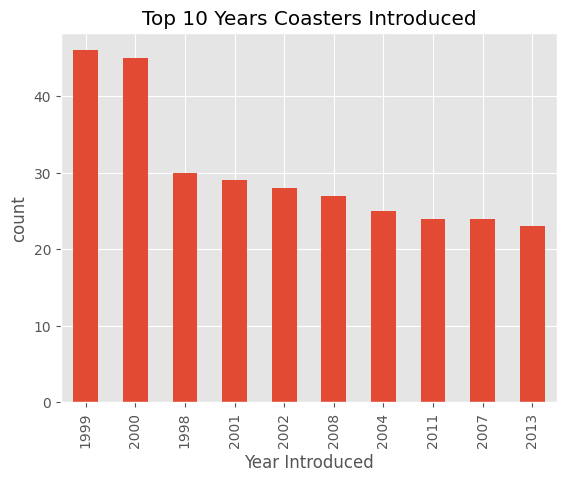

In [183]:
ax = df['Year_Introduced'].value_counts().head(10).plot(kind = 'bar', title = 'Top 10 Years Coasters Introduced')

ax.set_xlabel('Year Introduced')
ax.set_ylabel('count')

plt.show()

- Ploting Coasters Speed.

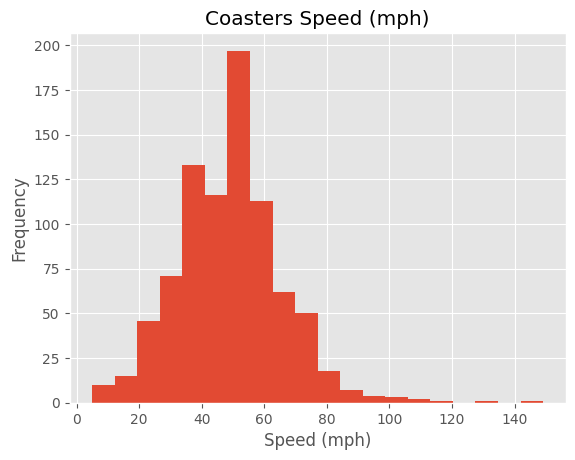

In [184]:
ax = df['Speed_mph'].plot(kind = 'hist', bins = (20), title = 'Coasters Speed (mph)')

ax.set_xlabel('Speed (mph)')

plt.show()

- Ploting Coasters Speed Density.

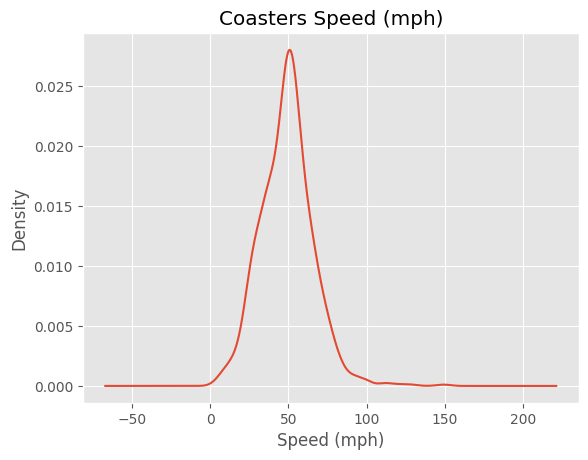

In [185]:
ax = df['Speed_mph'].plot(kind = 'kde', title = 'Coasters Speed (mph)')

ax.set_xlabel('Speed (mph)')

plt.show()

Step 4: Feature Relationships.
        
    - Scatterplots.
    - Pairplot.
    - Heatmap Correlation.
    - Groupby comparisons.

- Scatterplots.

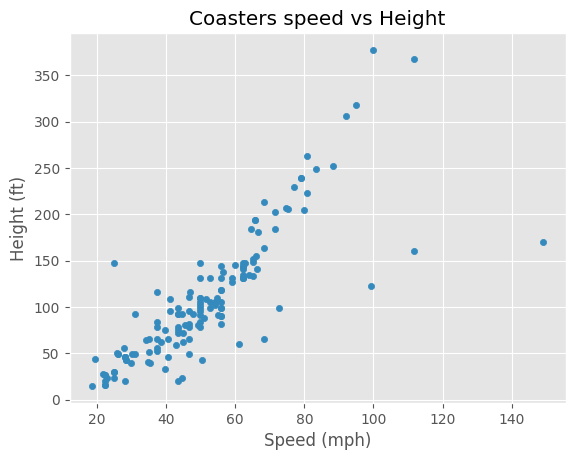

In [186]:
ax = df.plot(kind = 'scatter', x = 'Speed_mph', y = 'Height_ft', title ='Coasters speed vs Height')

ax.set_xlabel('Speed (mph)')
ax.set_ylabel('Height (ft)')

plt.show()

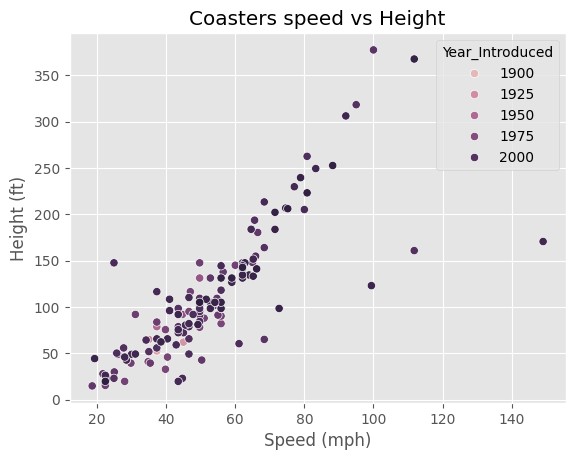

In [187]:
ax = sns.scatterplot(x = 'Speed_mph', y = 'Height_ft', hue = 'Year_Introduced', data = df)

ax.set_title('Coasters speed vs Height')
ax.set_xlabel('Speed (mph)')
ax.set_ylabel('Height (ft)')

plt.show()

- Pairplot.

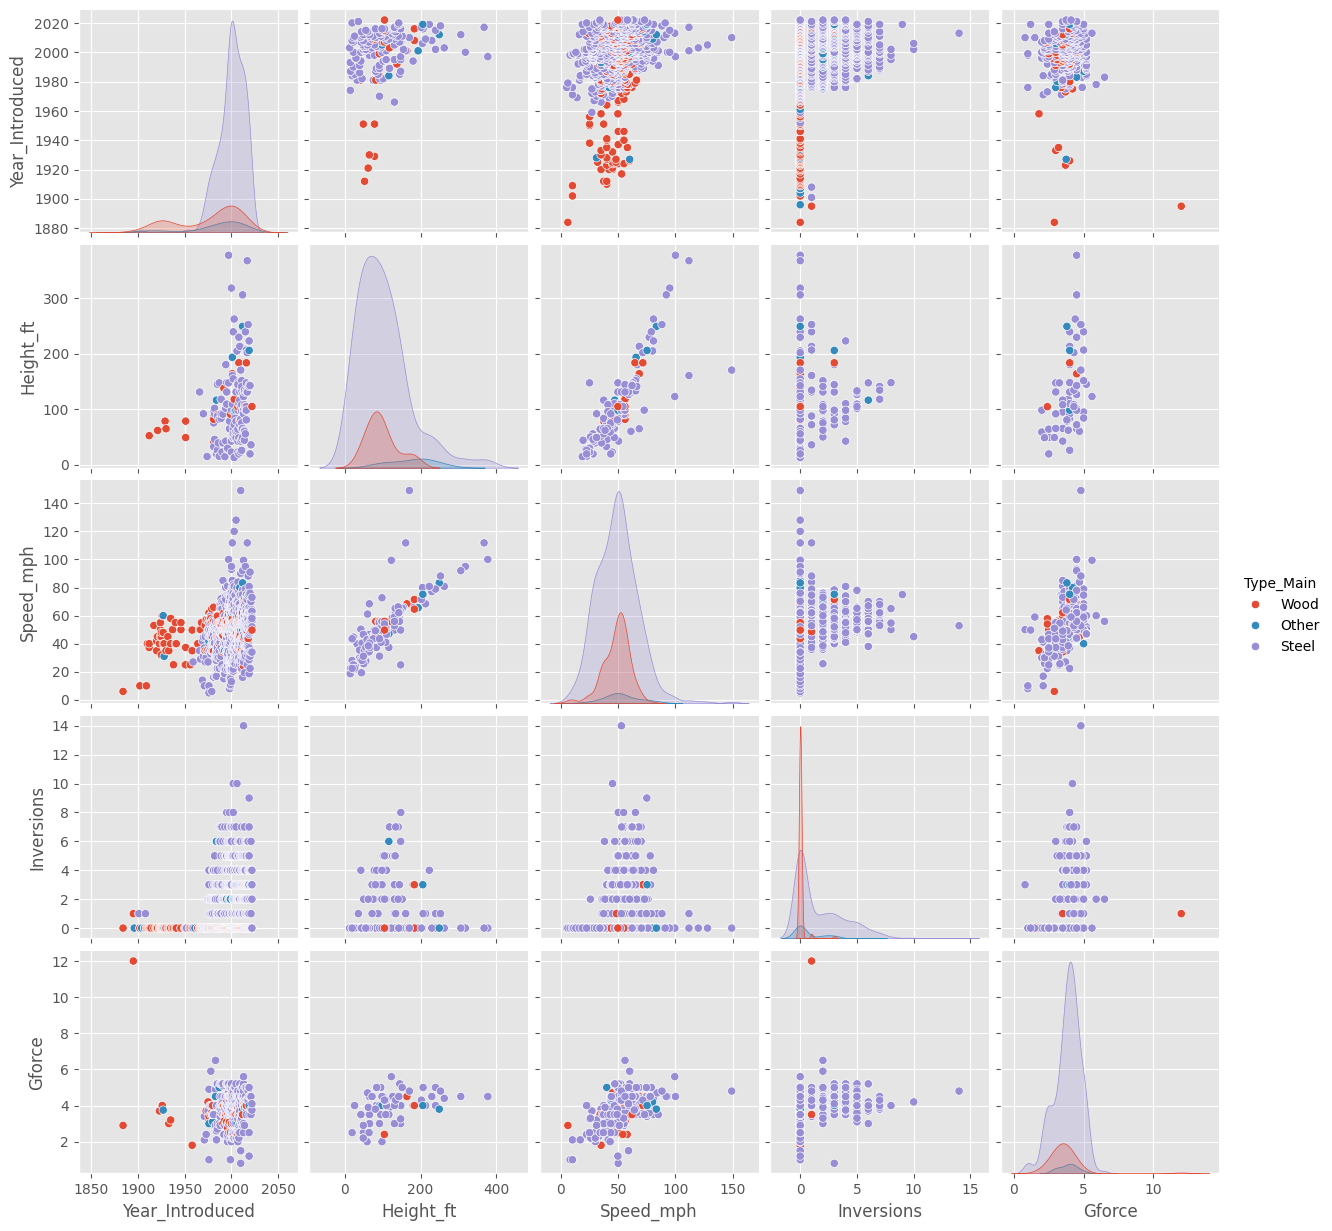

In [188]:
sns.pairplot(df, vars = ['Year_Introduced', 'Height_ft', 'Speed_mph', 'Inversions', 'Gforce'], 
             hue = 'Type_Main')

plt.show()

- Heatmap Correlation.

In [189]:
df_corr = df[['Year_Introduced', 'Speed_mph', 'Height_ft', 'Inversions', 'Gforce']].dropna().corr().round(2)

df_corr

,Year_Introduced,Speed_mph,Height_ft,Inversions,Gforce
Year_Introduced,1.00,0.17,0.14,-0.21,0.16
Speed_mph,0.17,1.00,0.73,-0.03,0.61
Height_ft,0.14,0.73,1.00,-0.08,0.47
Inversions,-0.21,-0.03,-0.08,1.00,0.28
Gforce,0.16,0.61,0.47,0.28,1.00


<Axes: >

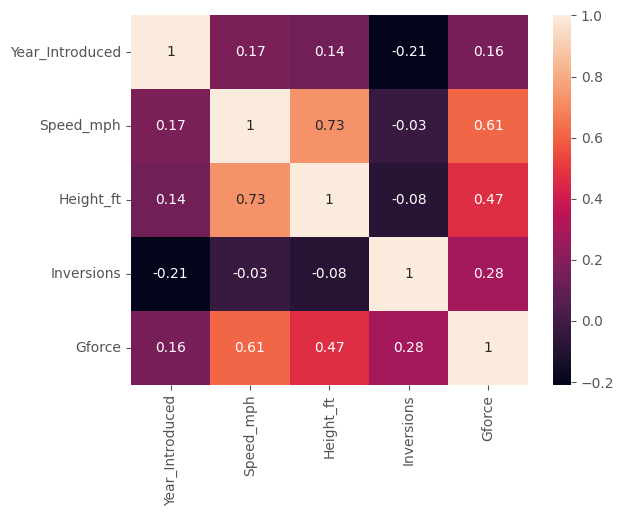

In [190]:
sns.heatmap(df_corr, annot=True)

Step 5: My Question about the data.

    - What are the locations with the bigest Gforce roller coasters?

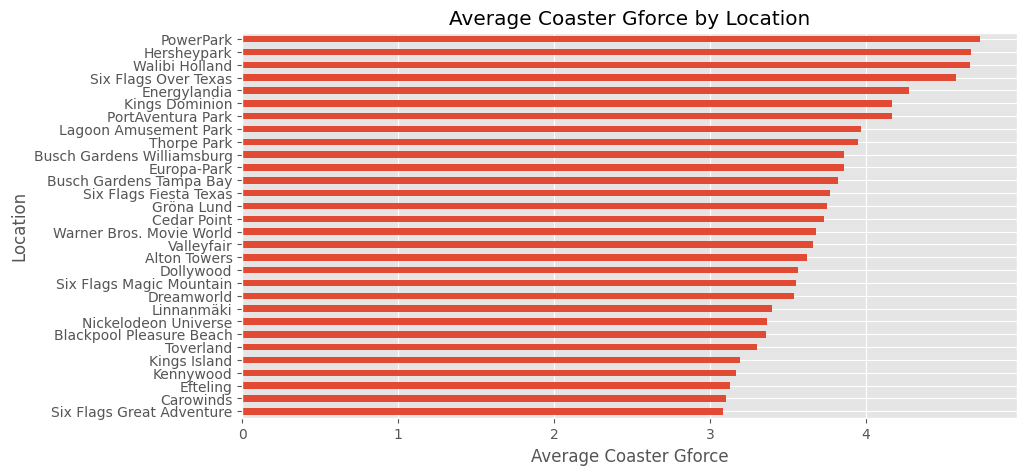

In [191]:
ax = df.query('Location != "Other"') \
       .groupby('Location')['Gforce'] \
       .agg(['mean','count']) \
       .query('count >= 3') \
       .sort_values('mean')['mean'] \
       .plot(kind='barh', figsize=(10, 5), title='Average Coaster Gforce by Location')

ax.set_xlabel('Average Coaster Gforce')

plt.show()